In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from pandas.api.types import is_string_dtype
filterwarnings('ignore')

pd.options.display.max_columns = None
#plt.rcParams['figure.figsize'] = [10,10]

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ML Projects/Car_Price_Prediction/train.csv')
dt = pd.read_csv(r'/content/drive/MyDrive/ML Projects/Car_Price_Prediction/test.csv')

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
dt.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [ ]:
df.shape, dt.shape

((19237, 18), (8245, 18))

In [ ]:
#saving the dependent variable in target
target = df['Price']

In [ ]:
#combining both training and testing  dataset
da = df.drop(['Price'],axis=1)
dt=dt.drop(['Price'],axis=1)
combined_data = da.append(dt)
combined_data.reset_index(inplace=True)
combined_data = combined_data.drop(['index'],axis=1)

In [ ]:
combined_data.shape

(27482, 17)

EDA Process will be done on the training Data only where as Data cleaning will be applied on Combined_data and training data

In [ ]:
#checking the dtypes and Unique values
info = pd.DataFrame()
info['DataTypes'] = df.dtypes
info['Unique_values'] = df.nunique()

In [ ]:
info.sort_values(by=['Unique_values'])

,DataTypes,Unique_values
Wheel,object,2
Leather interior,object,2
Doors,object,3
Drive wheels,object,3
Gear box type,object,4
Fuel type,object,7
Category,object,11
Cylinders,float64,13
Color,object,16
Airbags,int64,17


In [ ]:
#converting the Levy column to float as it is the Tax 
df.Levy = pd.to_numeric(df.Levy.replace('-', '0'), downcast='float')
combined_data.Levy = pd.to_numeric((combined_data.Levy.replace('-','0')), downcast='float')


In [ ]:
df.describe()

,Price,Levy,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,632.528687,2010.912824,4.582991,6.582627
std,1.905813e+05,567.708252,5.668673,1.199933,4.320168
min,1.000000e+00,0.000000,1939.000000,1.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,4.000000,6.000000
75%,2.207500e+04,917.000000,2015.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


In [ ]:
df.describe(include='object')

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,65,1590,11,2,7,107,7687,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


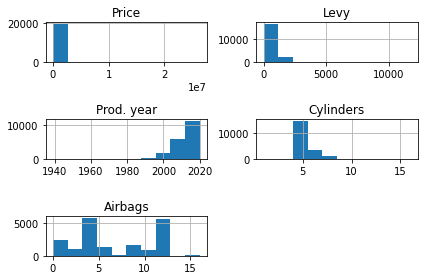

In [ ]:
#distribution of numeric variables
df.hist()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of price')

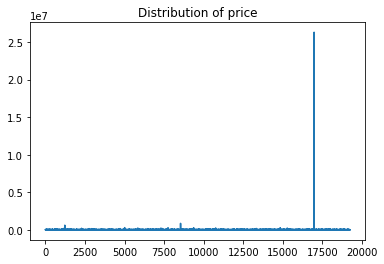

In [ ]:
dx = df['Price']
plt.plot(dx)
plt.title('Distribution of price')
#this below plot shows that the dependednt variable is higly left skewed


In [ ]:
#shapiro test to check the skewness
from scipy.stats import shapiro
x = shapiro(df['Price'])
if x[1] <= 0:
    print('Negatively skewed')
else:
    print('Positively Skewed')
  

Negatively skewed


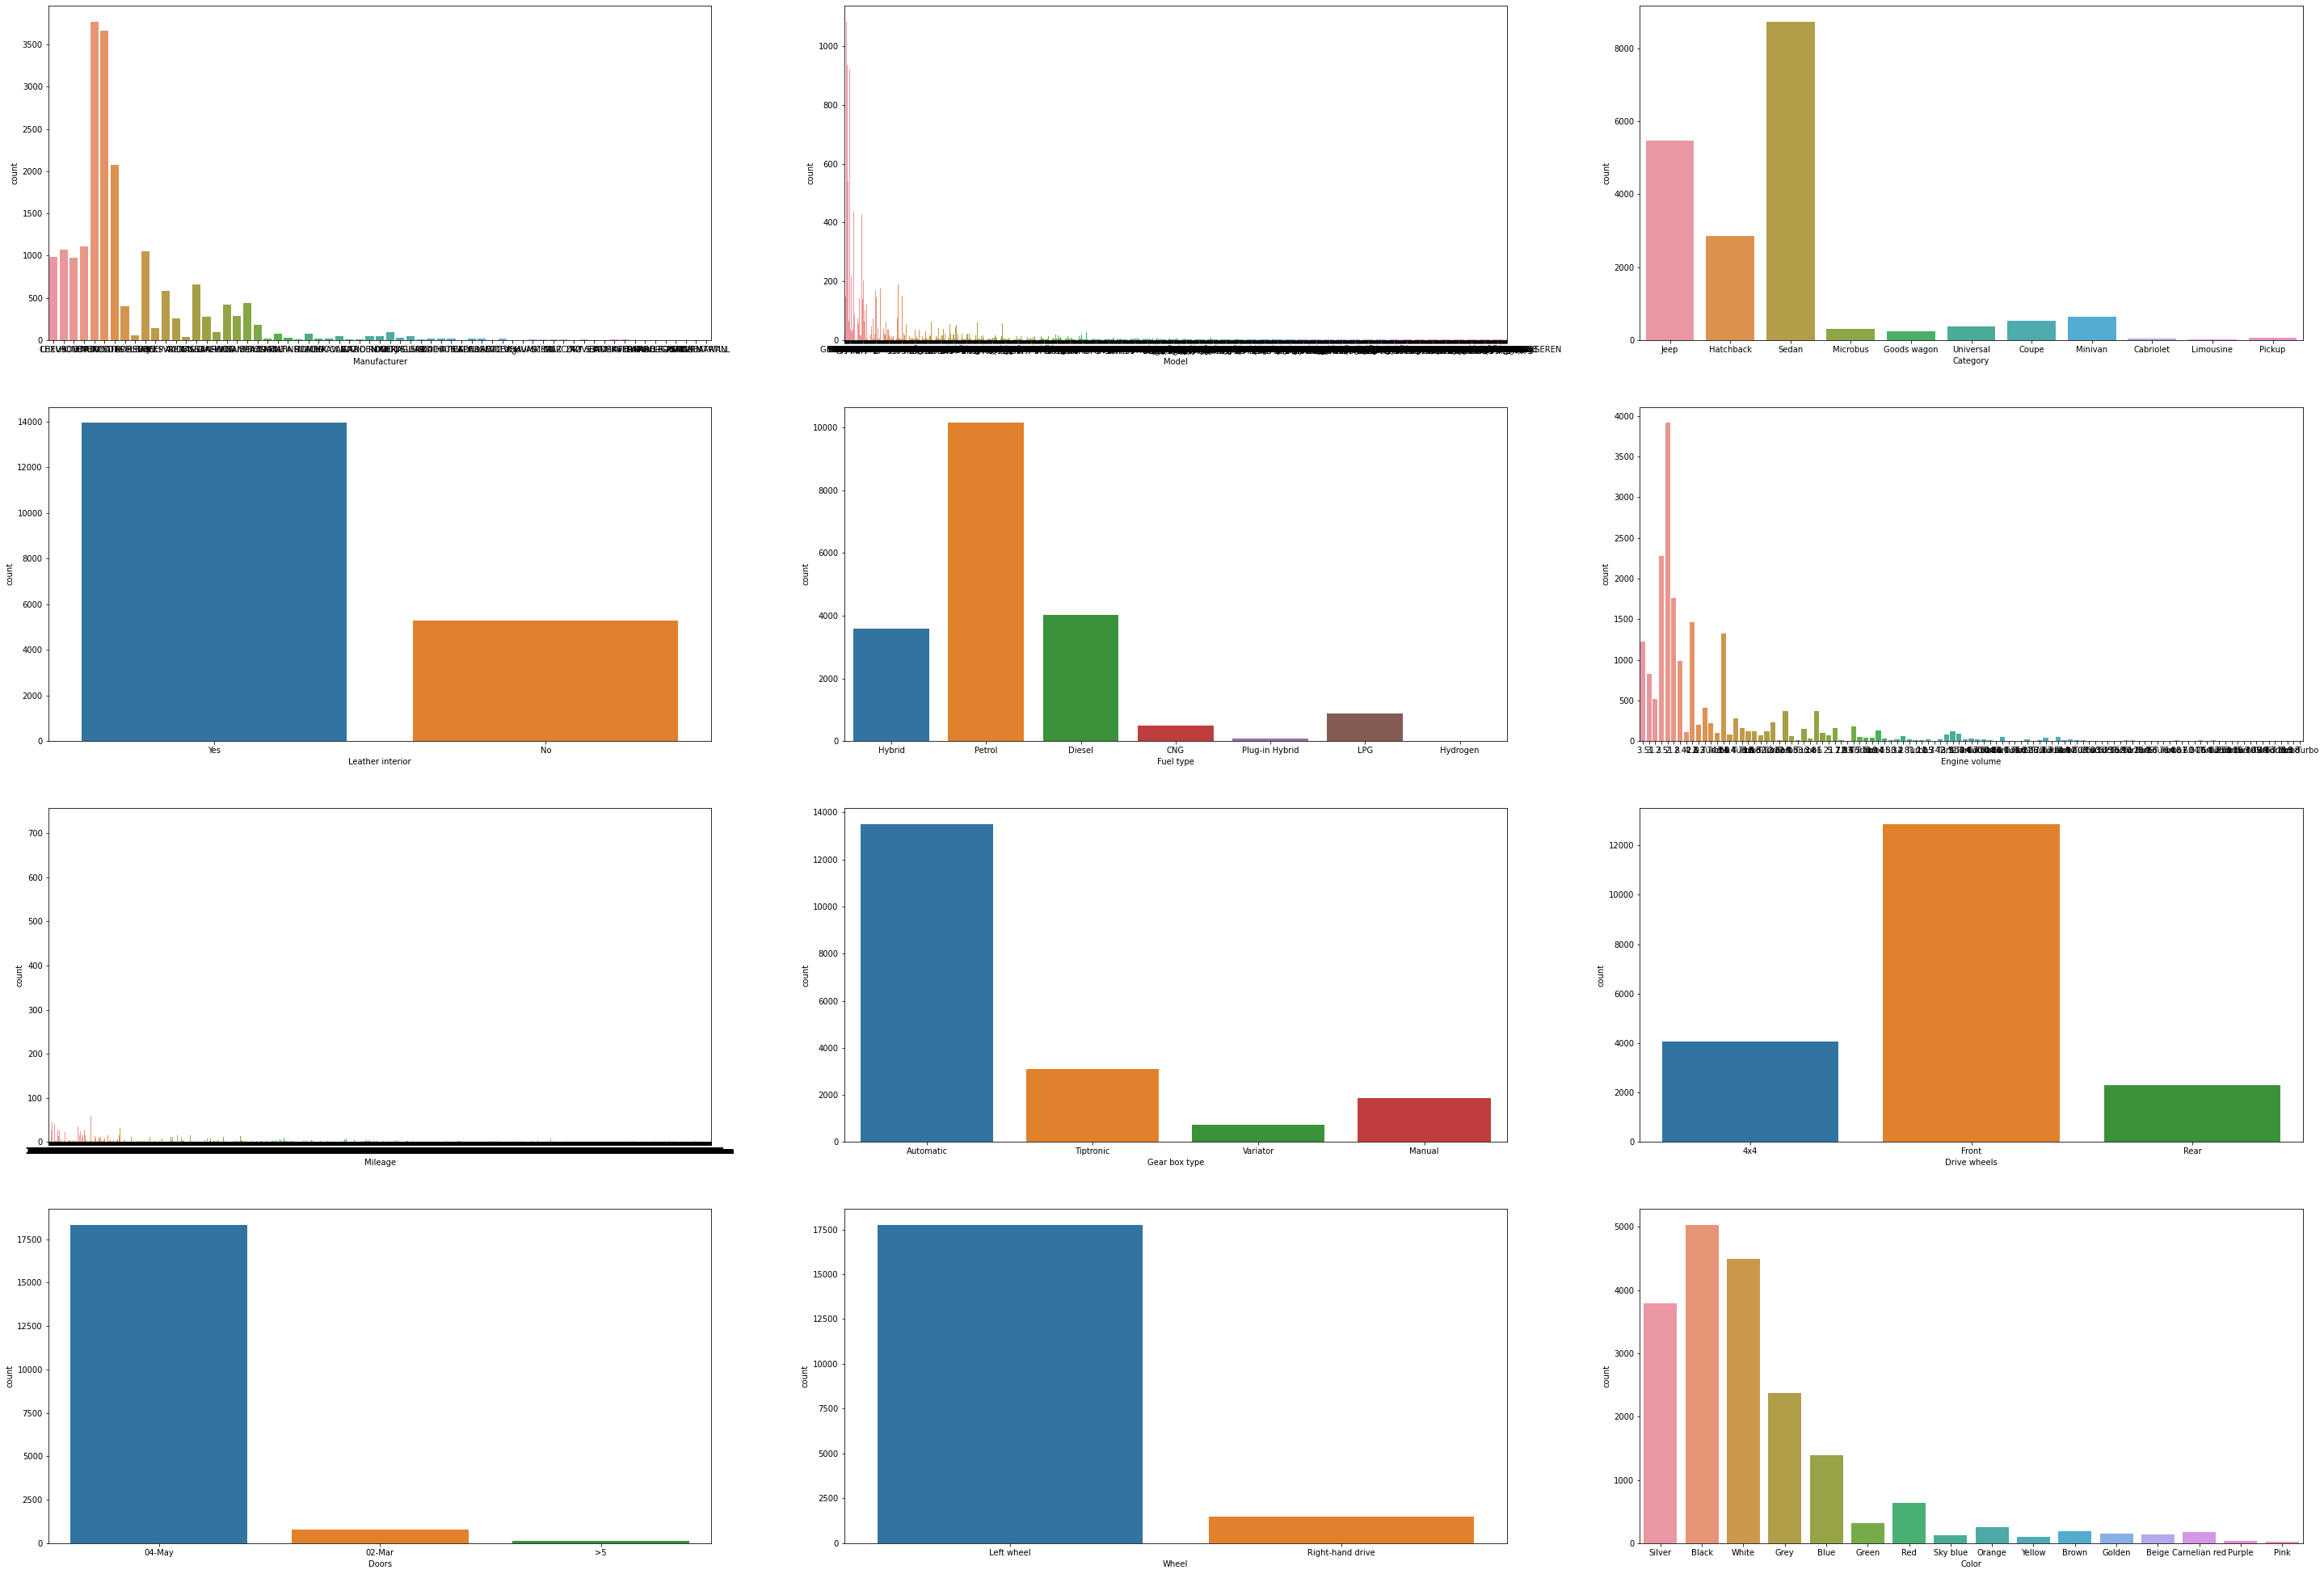

In [ ]:
categorical=[]

for column in df:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

fig, ax = plt.subplots(4, 3, figsize = (50, 35))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)
    
# display the plot
plt.show()

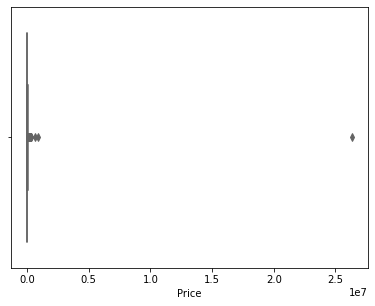

In [ ]:
#checking the outliers in the dependent variable
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
sns.boxplot(df['Price'],color='coral')

,Price,Levy,Prod. year,Cylinders,Airbags
Price,1.000000,-0.003701,0.012982,0.007518,-0.012824
Levy,-0.003701,1.000000,0.364712,0.250950,0.128032
Prod. year,0.012982,0.364712,1.000000,-0.096797,0.236969
Cylinders,0.007518,0.250950,-0.096797,1.000000,0.176868
Airbags,-0.012824,0.128032,0.236969,0.176868,1.000000


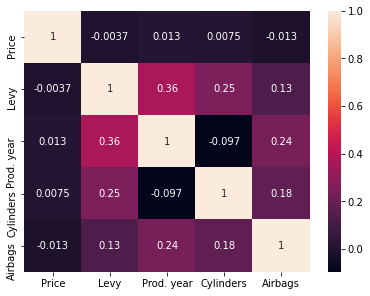

In [ ]:
sns.heatmap(df.corr(), cbar=True, annot=True)
df.corr()

From the correlation matrix we can conclude tat Mileage is not correlated to any other field and even any of the other independednt features are not highly correlated to each other

<h3> Missing Data Treatment </h3>

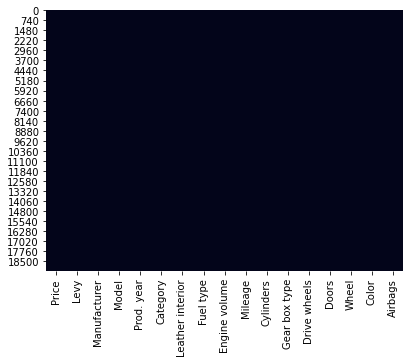

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
#from the below plot it is clear that there are no missing data in the dataset

In [ ]:
combined_data.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<h3>Data Cleaning will be applied on combined_data</h3>

In [ ]:
combined_data.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL', 'TATA', 'FOTON',
       'MG'], dtype=object)

In [ ]:
#removing the 'km' from the mileage column and converting it to float
df.Mileage = pd.to_numeric(df.Mileage.str.split(' ').str[0], downcast='float')
combined_data.Mileage = pd.to_numeric(combined_data.Mileage.str.split(' ').str[0], downcast='float')


In [ ]:
df.Mileage = np.where(df.Mileage == 0.0,df.Mileage.mean(),df.Mileage)
combined_data.Mileage = np.where(combined_data.Mileage == 0.0,combined_data.Mileage.mean(),combined_data.Mileage)

In [ ]:
combined_data.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
#cleaning the Doors column
combined_data.Doors = np.where((combined_data.Doors == '04-May') | (combined_data.Doors == '02-Mar'), combined_data.Doors.str.split('-').str[0],combined_data.Doors)


In [ ]:
combined_data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
combined_data['Engine volume'] = pd.to_numeric(combined_data['Engine volume'].str.split(' ').str[0], downcast='float')

In [ ]:
#for the records where engine volumn is 0 we'll be updating the actual engine volume of that car
combined_data[combined_data['Engine volume'] == 0.0]
#combined_data['Engine volume'] = np.where(combined_data['Engine volume'] == 0.0,combined_data['Engine volume'].mean(),combined_data['Engine volume'])

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2010,45751914,87.0,TESLA,Model X,2018,Sedan,Yes,Petrol,0.0,81907.000,6.0,Automatic,4x4,04,Left wheel,Silver,12
3105,45814922,87.0,MERCEDES-BENZ,C 250,2013,Coupe,Yes,Petrol,0.0,121600.000,4.0,Automatic,Rear,04,Left wheel,White,12
3516,45729814,87.0,HYUNDAI,Elantra,2016,Sedan,Yes,LPG,0.0,65004.000,4.0,Automatic,Front,04,Left wheel,White,4
4814,45809261,87.0,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,0.0,118000.000,4.0,Automatic,Front,04,Left wheel,Grey,4
7022,45809887,87.0,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,0.0,118000.000,4.0,Automatic,Front,04,Left wheel,Grey,4
7685,45729847,87.0,SSANGYONG,REXTON,2016,Jeep,Yes,Diesel,0.0,73968.000,4.0,Automatic,Front,04,Left wheel,Black,4
10603,45757531,87.0,TOYOTA,Prius,2010,Hatchback,No,Hybrid,0.0,1468032.625,4.0,Automatic,Front,04,Left wheel,Golden,0
12917,45814948,87.0,MERCEDES-BENZ,E 350,2016,Sedan,Yes,Petrol,0.0,33600.000,6.0,Automatic,Rear,04,Left wheel,White,12
14642,45816369,87.0,PORSCHE,Panamera,2011,Sedan,Yes,Petrol,0.0,196800.000,6.0,Automatic,Rear,04,Left wheel,Black,12
17375,45814941,87.0,MERCEDES-BENZ,CLS 550,2014,Sedan,Yes,Petrol,0.0,92800.000,8.0,Automatic,Rear,04,Left wheel,Black,12


In [ ]:
#for the records where engine volumn is 0 we'll be updating the actual engine volume of that car
combined_data['Engine volume'][3105] = 1.8
combined_data['Engine volume'][3516] = 1.6
combined_data['Engine volume'][4814]= 1.5
combined_data['Engine volume'][7022]=1.5
combined_data['Engine volume'][7685]= 2.2
combined_data['Engine volume'][10603]=1.8
combined_data['Engine volume'][12917]=3.5
combined_data['Engine volume'][14642]=3.6
combined_data['Engine volume'][17375]=4.7
combined_data['Engine volume'][21748]= 2.0
combined_data['Engine volume'][22798]=1.5
combined_data['Engine volume'][25931]=1.8
combined_data['Engine volume'][26245]= 2

In [ ]:
combined_data[combined_data['Engine volume'] == 0.0]
#tesla cars have no engine volumn hence they are 0

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2010,45751914,87.0,TESLA,Model X,2018,Sedan,Yes,Petrol,0.0,81907.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
20687,45792392,87.0,TESLA,Model X,2018,Sedan,Yes,Petrol,0.0,81907.0,6.0,Automatic,4x4,04,Left wheel,Silver,12


In [ ]:
combined_data

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27477,44824410,1357.0,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000.0,4.0,Manual,Front,04,Left wheel,Blue,6
27478,45682346,0.0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,156000.0,4.0,Tiptronic,Front,04,Left wheel,Black,6
27479,45649860,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907.0,8.0,Automatic,4x4,04,Left wheel,Black,0
27480,45809706,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000.0,4.0,Automatic,Front,04,Left wheel,Green,4


In [ ]:
#setting up the age of the car that is the difference between the current year and the Prod. Year
import datetime as dt
currt_time = dt.datetime.now()
combined_data['Prod. year'] = currt_time.year - combined_data['Prod. year'] 


In [ ]:
#deleting the Model column as it has more biased data
combined_data = combined_data.drop(['Model'],axis=1)

In [ ]:
combined_data.head()

,ID,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,11,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,10,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,0.0,HONDA,15,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.0,FORD,10,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.0,HONDA,7,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


In [ ]:
#replaceing the 0 values of Levy column with its mean()
combined_data.Levy = np.where(combined_data.Levy == 0.0,combined_data.Levy.mean(),combined_data.Levy)

In [ ]:
categ = combined_data.select_dtypes(include='object')
num = combined_data.select_dtypes(include = np.number)

In [ ]:
cat_dummies = pd.get_dummies(categ,drop_first=True)

In [ ]:
#final_data whch will be used for training the model
final_data = pd.concat([num,cat_dummies], axis=1)

In [ ]:
final_data.shape

(27482, 114)

In [ ]:
#fetching the train data from the final_data
train_data = final_data.iloc[:19237]
train_data.shape

(19237, 114)

In [ ]:
#fetching the test data from the final_data
test_data = final_data.iloc[19237:]
test_data.shape

(8245, 114)

In [ ]:
#since the dependent variable is negatively skewed log transformation is used
target = np.log(target)

In [ ]:
target

0         9.497622
1         9.718422
2         9.043932
3         8.190632
4         9.369564
           ...    
19232     9.043932
19233     9.660205
19234    10.169997
19235     8.581294
19236     6.152733
Name: Price, Length: 19237, dtype: float64

In [ ]:
#training the model with the train data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = train_data
Y=target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)


In [ ]:
#Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
mod = LinearRegression()
model1 = mod.fit(X_train,Y_train)

In [ ]:
from statsmodels.tools.eval_measures import rmse
model1_predicted = model1.predict(X_test)
model1_rmse = rmse(Y_test,model1_predicted)
print('Linear Regression', model1_rmse)

Linear Regression 1.3783490489149832


In [ ]:
from sklearn.metrics import mean_squared_log_error
print('Linear Regression',np.sqrt(mean_squared_log_error(np.exp(Y_test), np.exp(model1_predicted))))

Linear Regression 1.374267884228672


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
mod2 = RandomForestRegressor(n_estimators=100,random_state=10)
model2 = mod2.fit(X_train,Y_train)

In [ ]:
from statsmodels.tools.eval_measures import rmse
model2_predicted = model2.predict(X_test)
model2_rmse = rmse(Y_test,model2_predicted)
model2_rmse

0.8778974869713481

In [ ]:
print('RandomForestRegressor',np.sqrt(mean_squared_log_error(np.exp(Y_test),np.exp(model2_predicted))))

RandomForestRegressor 0.8734562325947708


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

#Randomized Search CV to tune the RandomForest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
print('RandomForest_Search', np.sqrt(mean_squared_log_error(np.exp(Y_test),np.exp(predictions))))

RandomForest_Search 0.8661790773394549


In [ ]:
#this is the best model hence we'll be considering this to generate the test predictions
test_data_predicted = rf_random.predict(test_data)
dt2 = pd.DataFrame(np.exp(test_data_predicted))
dt2.to_csv('/content/drive/MyDrive/ML Projects/Car_Price_Prediction/sol.csv',index=False)

In [ ]:
#RandomForest based on the best features from the RandomSearchCV
mod3 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [ ]:
model3 = mod3.fit(X_train, Y_train)

In [ ]:
model3_predict=model3.predict(X_test)

In [ ]:
print('Random Foresst with tuned parameters',np.sqrt(mean_squared_log_error(np.exp(Y_test),np.exp(model3_predict))))

Random Foresst with tuned parameters 0.8635282349126835


Feature Selection using RandomForest

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reg= ExtraTreesRegressor()
model3 = reg.fit(X_train,Y_train)
important_features = pd.Series(reg.feature_importances_, index=X_train.columns)

In [ ]:
pd.DataFrame(important_features.nlargest(100)).index

Index(['ID', 'Mileage', 'Airbags', 'Prod. year', 'Levy', 'Engine volume',
       'Gear box type_Tiptronic', 'Leather interior_Yes', 'Fuel type_Hybrid',
       'Cylinders', 'Fuel type_Diesel', 'Manufacturer_HYUNDAI', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Category_Sedan',
       'Fuel type_Petrol', 'Category_Jeep', 'Color_Silver',
       'Manufacturer_TOYOTA', 'Color_Grey', 'Wheel_Right-hand drive',
       'Category_Hatchback', 'Gear box type_Variator', 'Manufacturer_HONDA',
       'Manufacturer_MERCEDES-BENZ', 'Drive wheels_Rear', 'Color_Blue',
       'Manufacturer_LEXUS', 'Gear box type_Manual', 'Manufacturer_SSANGYONG',
       'Manufacturer_BMW', 'Manufacturer_FORD', 'Manufacturer_NISSAN',
       'Doors_04', 'Fuel type_LPG', 'Color_Red', 'Manufacturer_CHEVROLET',
       'Manufacturer_VOLKSWAGEN', 'Manufacturer_AUDI', 'Category_Minivan',
       'Category_Coupe', 'Manufacturer_SUBARU', 'Manufacturer_KIA',
       'Color_Brown', 'Color_Green', 'Manufacturer_MAZDA', '

In [ ]:
X1 = train_data[['ID', 'Mileage', 'Airbags', 'Prod. year', 'Levy', 'Engine volume',
       'Gear box type_Tiptronic', 'Leather interior_Yes', 'Fuel type_Hybrid',
       'Cylinders', 'Fuel type_Diesel', 'Color_White', 'Manufacturer_HYUNDAI',
       'Color_Black', 'Drive wheels_Front', 'Category_Sedan',
       'Fuel type_Petrol', 'Category_Jeep', 'Manufacturer_TOYOTA',
       'Color_Silver', 'Color_Grey', 'Category_Hatchback',
       'Wheel_Right-hand drive']]
Y1=target

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.3, random_state=10)

In [ ]:
model4 = rf.fit(X1_train, Y1_train)

In [ ]:
model4_predict=model4.predict(X1_test)

In [ ]:
np.sqrt(mean_squared_log_error(np.exp(Y1_test),np.exp(model4_predict)))

0.8771520037471914

In [ ]:
x=[1,2,3]
for i, n in enumerate(x):
  print(n)

1
2
3
